In [62]:
# Imports

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import binom


In [63]:
# Construindo dados

dados = pd.read_csv('/content/drive/MyDrive/Estatística Aplicada/housing.csv', sep=',', encoding='iso-8859-1')

print(f'A quantidade total de registros é: {len(dados)}')

A quantidade total de registros é: 489


`Apresente os dados da estatística descritiva (média, mediana, moda, quartis...) sobre as duas variáveis? Essas variáveis possuem outliers (apresentar o gráfico BoxPlot)?`

`**Sim, conforma mostrado no gráfico Boxplot, ambas variáveis possuem outliers**`


Legenda:
MEDV: valor médio das casas
RM: número de cômodos

                MEDV          RM
count  4.890000e+02  489.000000
mean   4.543429e+05    6.240288
std    1.653403e+05    0.643650
min    1.050000e+05    3.561000
25%    3.507000e+05    5.880000
50%    4.389000e+05    6.185000
75%    5.187000e+05    6.575000
max    1.024800e+06    8.398000

Quartis:
          MEDV     RM
0.25  350700.0  5.880
0.50  438900.0  6.185
0.75  518700.0  6.575

Mediana:
MEDV    438900.000
RM           6.185
dtype: float64

Moda:
MEDV    525000.000
RM           5.713
Name: 0, dtype: float64

Média: 
MEDV    454342.944785
RM           6.240288
dtype: float64

Variância do valor médio das casas: 27337407414.26
Variância do número de cômodos: 0.41
Desvio padrão do valor médio das casas: 165340.28
Desvio padrão do número de cômodos: 0.64
Tabela de frequência do valor médio das casas:

 MEDV
525000.0    8
485100.0    7
462000.0    7
455700.0    7
407400.0    6
           ..
690900.0    1
726600.0    1
636300

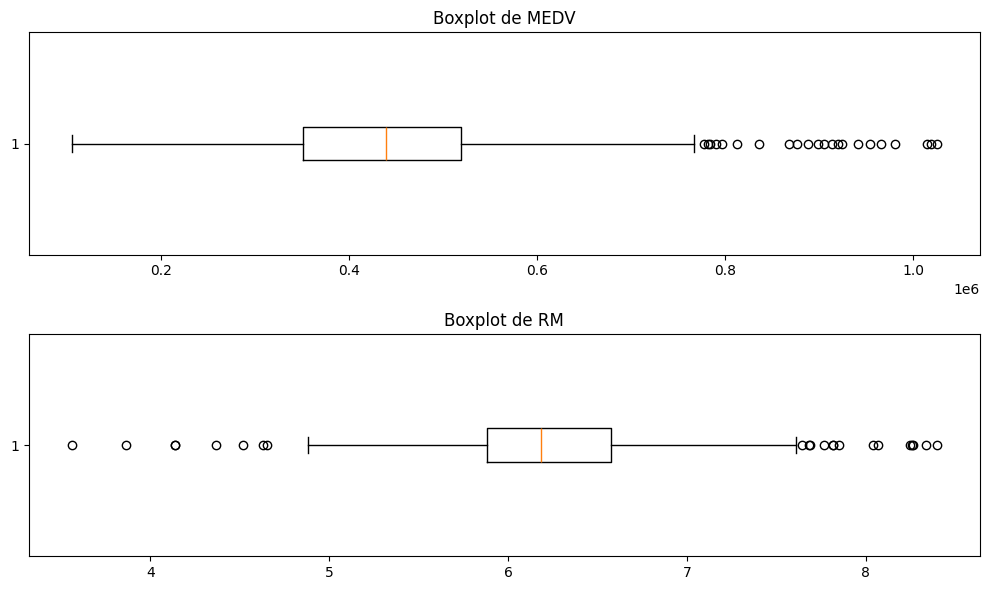

In [64]:
# Questão 1


# Legenda
print("\nLegenda:")
print("MEDV: valor médio das casas")
print("RM: número de cômodos")

print("\n",dados[['MEDV', 'RM']].describe())

# Quartis
print("\nQuartis:")
print(dados[['MEDV', 'RM']].quantile([0.25, 0.5, 0.75]))

# Mediana
print("\nMediana:")
print(dados[['MEDV', 'RM']].median())

# Moda
print("\nModa:")
print(dados[['MEDV', 'RM']].mode().iloc[0])

# Media
print("\nMédia: ")
print(dados[['MEDV', 'RM']].mean())

# Variância:
varianciaPreco = dados['MEDV'].var()
print('\nVariância do valor médio das casas: {:.2f}'.format(varianciaPreco))
varianciaComodos = dados['RM'].var()
print('Variância do número de cômodos: {:.2f}'.format(varianciaComodos))

# Desvio padrão

desvioPreco = dados['MEDV'].std()
print('Desvio padrão do valor médio das casas: {:.2f}'.format(desvioPreco))
desvioComodos = dados['RM'].std()
print('Desvio padrão do número de cômodos: {:.2f}'.format(desvioComodos))

# Tabela de frequência

freqPreco = dados['MEDV'].value_counts()
print('Tabela de frequência do valor médio das casas:')
print("\n",freqPreco)


# Boxplot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(dados['MEDV'], vert=False)
plt.title('Boxplot de MEDV')

plt.subplot(2, 1, 2)
plt.boxplot(dados['RM'], vert=False)
plt.title('Boxplot de RM')

plt.tight_layout()
plt.show()


`Apresente os resultados dos testes de normalidade (gráfico QQPlot e teste de hipótese). Os dados possuem distribuição normal?`

`Os gráficos mostram que não há distribuiçõo normal.`


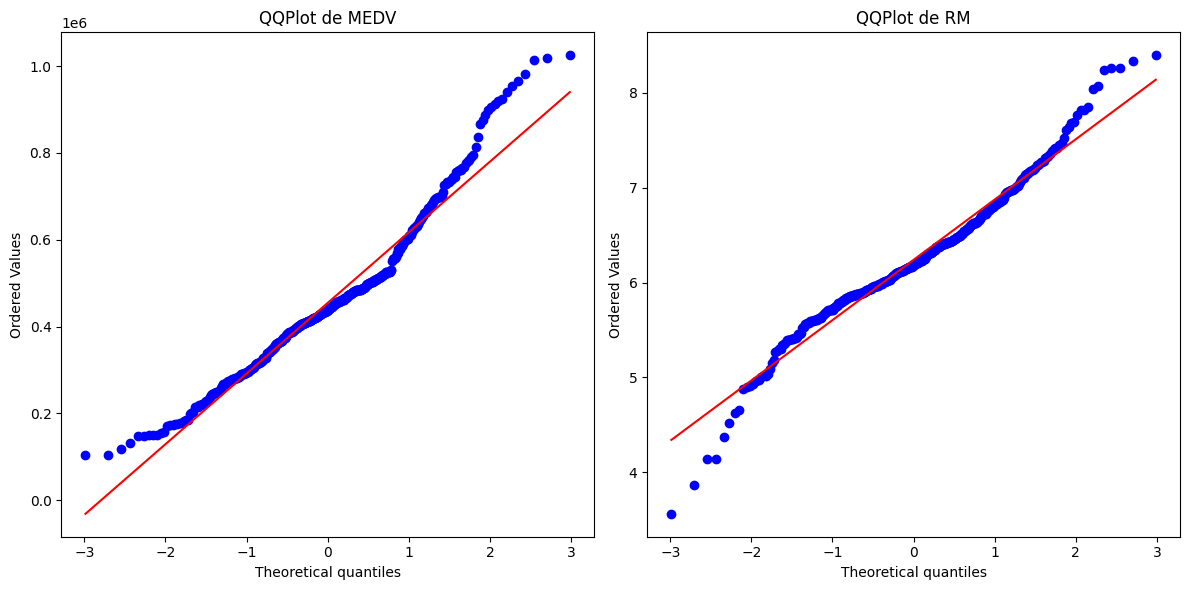

Teste de Shapiro-Wilk para MEDV: ShapiroResult(statistic=0.9596616055953767, pvalue=2.5759801704018553e-10)
Teste de Shapiro-Wilk para RM: ShapiroResult(statistic=0.9708170375303297, pvalue=2.7090145811327798e-08)


In [65]:
# Questão 2

# Gráfico QQPlot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(dados['MEDV'], dist="norm", plot=plt)
plt.title('QQPlot de MEDV')

plt.subplot(1, 2, 2)
stats.probplot(dados['RM'], dist="norm", plot=plt)
plt.title('QQPlot de RM')

plt.tight_layout()
plt.show()

# Teste Shapiro-Wilk
shapiro_test_medv = stats.shapiro(dados['MEDV'])
shapiro_test_rm = stats.shapiro(dados['RM'])

print("Teste de Shapiro-Wilk para MEDV:", shapiro_test_medv)
print("Teste de Shapiro-Wilk para RM:", shapiro_test_rm)



`Questão 3`

---

```
Qual o coeficiente de correlação adequado para essa situação (Pearson, Spearman ou Kendall). Por quê?

R: Os dados não possuem distribuiçao normal, portanto Spearman é o mais adequado.
Esse coeficiente mede a correlação entre as classificações das duas variáveis, não exigindo que as variáveis tenham uma distribuição normal.
```








`Qual o valor do coeficiente de correlação entre as variáveis?`




In [66]:
# Questão 4

# Cálculo do coeficiente de correlação de Spearman

correlacao_spearman = stats.spearmanr(dados['MEDV'], dados['RM'])
print("\nCoeficiente de correlação de Spearman:", correlacao_spearman)


Coeficiente de correlação de Spearman: SignificanceResult(statistic=0.6240572939087418, pvalue=3.845028634343325e-54)


`Classifique o tipo de correlação entre as variáveis (positiva, negativa, forte, fraca, muito forte, moderada...)?`

In [67]:
# Questão 5

correlacao = correlacao_spearman[0]
print('A correlação é moderada e positiva, de valor: {:.2f}'.format(correlacao))

A correlação é moderada e positiva, de valor: 0.62


`Qual o coeficiente de determinação entre as variáveis?
`



In [68]:
# Questão 6

r_squared = correlacao_spearman[0]**2
print("\nCoeficiente de determinação (R²):", r_squared)


Coeficiente de determinação (R²): 0.3894475060807017


`Apresente um gráfico com os valores observados e com a reta de regressão.`

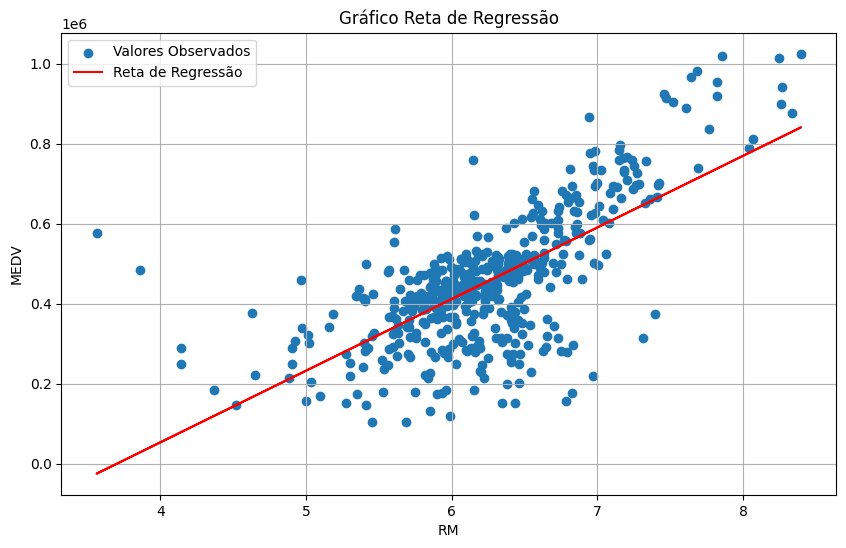

In [69]:
# Questão 7

# Modelo de regressão linear
X = dados['RM']
y = dados['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Realizando as previsões
y_pred = model.predict(X)

# Criando o gráfico de dispersão com a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(dados['RM'], dados['MEDV'], label='Valores Observados')
plt.plot(dados['RM'], y_pred, color='red', label='Reta de Regressão')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Gráfico Reta de Regressão')
plt.legend()
plt.grid(True)
plt.show()

`Qual a equação do modelo de regressão?`

In [70]:
# Questão 8

# Coeficientes do modelo
intercepto = model.params[0]  # b (coeficiente linear)
coeficiente_rm = model.params[1]  # m (coeficiente angular)

# Equação
equacao = f"y = {coeficiente_rm:.4f} * x + {intercepto:.4f}"
print("A equação do modelo de regressão é:")
print(equacao)


A equação do modelo de regressão é:
y = 179098.5919 * x + -663283.9106


`Determine a previsão para o valor de um imóvel dessa região com 11 cômodos.`

In [71]:
# Questão 9

# Previsão utilizando formula de regressão
coeficiente_rm = model.params[1]
intercepto = model.params[0]

# Imóvel com 11 cômodos
previsao = coeficiente_rm * 11 + intercepto
print(f"Previsão para um imóvel com 11 cômodos: {previsao:.2f}")

Previsão para um imóvel com 11 cômodos: 1306800.60


`Considerando nível de significância de 0,01, há evidências para afirmar que a média dos valores médios das casas com RM (número médio de cômodos) entre 6 e 7 é igual a média dos valores médios de todas as casas? Justifique a conclusão com os resultados do teste de hipótese, destacando o teste de hipótese utilizado.`

---

`Hipótese nula (H₀): A média dos valores médios das casas com RM entre 6 e 7 é igual à média dos valores médios de todas as casas.`

`Hipótese alternativa (Hₐ): A média dos valores médios das casas com RM entre 6 e 7 é diferente da média dos valores médios de todas as casas`

`R: Sendo 0.01 o nível de significancia, não há evidências suficientes para afirmar que a média dos valores médios das casas com RM entre 6 e 7 é diferente da média dos valores médios de todas as casas, portanto H0 é aceito.`

In [72]:
# Questão 10

# Filtra os dados para casas com RM entre 6 e 7
casas_rm_6_7 = dados[(dados['RM'] >= 6) & (dados['RM'] < 7)]['MEDV']

# Média dos valores médios das casas com RM entre 6 e 7
media_casas_rm_6_7 = np.mean(casas_rm_6_7)

# Média dos valores médios de todas as casas
media_todas_casas = dados['MEDV'].mean()

# Teste de Mann-Whitney
statistic, p_value = stats.mannwhitneyu(casas_rm_6_7, dados['MEDV'])

# Nível de significância
alpha = 0.01

print(f"Média das casas com RM entre 6 e 7: {media_casas_rm_6_7:.4f}")
print(f"Média de todas as casas: {media_todas_casas:.4f}")
print(f"Estatística do teste: {statistic:.4f}")
print('P valor:', p_value)


Média das casas com RM entre 6 e 7: 457933.7079
Média de todas as casas: 454342.9448
Estatística do teste: 70166.0000
P valor: 0.08878323670043234
